In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from IPython.core.interactiveshell import InteractiveShell # 모든 명령어 출력
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

## Bayesian Statistics: Metropolis-Hastings from scratch in Python
https://towardsdatascience.com/bayesian-statistics-metropolis-hastings-from-scratch-in-python-c3b10cc4382d

In [3]:
def normal(x,mu,sigma):
    numerator = np.exp((-(x-mu)**2)/(2*sigma**2))
    denominator = sigma * np.sqrt(2*np.pi)
    return numerator/denominator

In [26]:
def random_coin(p):
    unif = np.random.uniform(0,1)
    if unif>=p:
        return False
    else:
        return True

In [27]:
def gaussian_mcmc(hops,mu,sigma):
    states = []
    burn_in = int(hops*0.2)
    current = np.random.uniform(-5*sigma+mu, 5*sigma+mu)
    for i in range(hops):
        states.append(current)
        movement = np.random.uniform(-5*sigma+mu, 5*sigma+mu)
        
        curr_prob = normal(x=current, mu=mu, sigma=sigma)
        move_prob = normal(x=movement, mu=mu, sigma=sigma)
        
        acceptance = min(move_prob/curr_prob,1)
        if random_coin(acceptance):
            current = movement
            
    return states[burn_in:]

최초 선택한 현재 상태: -3.6945202396236776
0번째 선택한 현재상태: -3.6945202396236776
0번째 선택한 현재상태 확률: 0.0004334741329790694
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0번째 선택한 이동상태: -3.329441110543087
0번째 선택한 이동상태 확률: 0.001562407172854157
0번째 선택한 이동상태/현재상태 비율: 3.6043838697281596과 Acceptance : 1


-3.329441110543087

Start0_번째****************************************************************************************************END
1번째 선택한 현재상태: -3.329441110543087
1번째 선택한 현재상태 확률: 0.001562407172854157
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1번째 선택한 이동상태: 4.516939942972403
1번째 선택한 이동상태 확률: 1.4808462391145175e-05
1번째 선택한 이동상태/현재상태 비율: 0.009477979011126488과 Acceptance : 0.009477979011126488


-3.329441110543087

Start1_번째****************************************************************************************************END
2번째 선택한 현재상태: -3.329441110543087
2번째 선택한 현재상태 확률: 0.001562407172854157
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2번째 선택한 이동상태: -0.8704629352724771
2번째 선택한 이동상태 확률: 0.2731343735612147
2번째 선택한 이동상태/현재상태 비율: 174.81638481104852과 Acceptance : 1


-0.8704629352724771

Start2_번째****************************************************************************************************END
3번째 선택한 현재상태: -0.8704629352724771
3번째 선택한 현재상태 확률: 0.2731343735612147
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
3번째 선택한 이동상태: 4.069712690231697
3번째 선택한 이동상태 확률: 0.00010101725403119281
3번째 선택한 이동상태/현재상태 비율: 0.00036984453005345694과 Acceptance : 0.00036984453005345694


-0.8704629352724771

Start3_번째****************************************************************************************************END
4번째 선택한 현재상태: -0.8704629352724771
4번째 선택한 현재상태 확률: 0.2731343735612147
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
4번째 선택한 이동상태: -4.701753887659264
4번째 선택한 이동상태 확률: 6.317523086839813e-06
4번째 선택한 이동상태/현재상태 비율: 2.3129725506423426e-05과 Acceptance : 2.3129725506423426e-05


-0.8704629352724771

Start4_번째****************************************************************************************************END


(array([4.06672987, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 4.06672987]),
 array([-3.32944111, -3.2064922 , -3.08354329, -2.96059438, -2.83764548,
        -2.71469657, -2.59174766, -2.46879875, -2.34584984, -2.22290093,
        -2.09995202, -1.97700311, -1.85405421, -1.7311053 , -1.60815639,
        -1.48520748, -1.36225857, -1.23930966, -1.11636075, -0.99341184,
        -0.87046294]),
 <BarContainer object of 20 artists>)

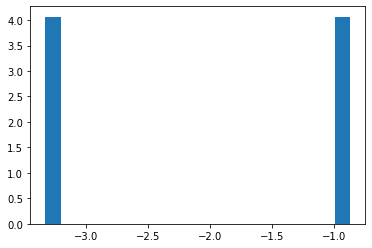

In [89]:
mu=0; sigma=1
hops = 5

states = []
burn_in = int(hops*0.2)
current = np.random.uniform(-5*sigma+mu, 5*sigma+mu)
print(f'최초 선택한 현재 상태: {current}')

for i in range(hops):
    
    states.append(current)
    
    movement = np.random.uniform(-5*sigma+mu, 5*sigma+mu)
    curr_prob = normal(x=current, mu=mu, sigma=sigma)
    print(f'{i}번째 선택한 현재상태: {current}')
    print(f'{i}번째 선택한 현재상태 확률: {curr_prob}')
    print('~'*50)
    move_prob = normal(x=movement, mu=mu, sigma=sigma)
    print(f'{i}번째 선택한 이동상태: {movement}')
    print(f'{i}번째 선택한 이동상태 확률: {move_prob}')

    acceptance = min(move_prob/curr_prob,1)
    print(f'{i}번째 선택한 이동상태/현재상태 비율: {move_prob/curr_prob}과 Acceptance : {acceptance}')
    
    if random_coin(acceptance):
        current = movement
    
    current
    print('Start' + str(i)+ '_번째'+'*'*100 + 'END')
    
dist = states[burn_in:]
plt.hist(dist,density=True, bins=20)

(array([2.89519120e-05, 1.15807648e-04, 8.10653536e-04, 2.31615296e-03,
        9.06194845e-03, 2.45512214e-02, 6.05673999e-02, 1.30862642e-01,
        2.28517441e-01, 3.40735052e-01, 3.94672464e-01, 3.85581564e-01,
        3.14446716e-01, 2.11609525e-01, 1.21105848e-01, 5.68036513e-02,
        2.48986443e-02, 7.00636270e-03, 1.96873002e-03, 4.92182504e-04]),
 array([-4.72046787, -4.28871746, -3.85696704, -3.42521663, -2.99346622,
        -2.5617158 , -2.12996539, -1.69821497, -1.26646456, -0.83471414,
        -0.40296373,  0.02878669,  0.4605371 ,  0.89228752,  1.32403793,
         1.75578834,  2.18753876,  2.61928917,  3.05103959,  3.48279   ,
         3.91454042]),
 <BarContainer object of 20 artists>)

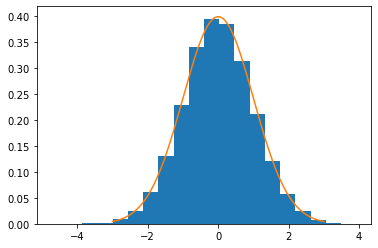

In [88]:
lines = np.linspace(-3,3,1000)
normal_curve = [normal(l,mu=0,sigma=1) for l in lines]

dist = gaussian_mcmc(100_000, mu=0,sigma=1)
plt.hist(dist,density=True, bins=20)
plt.plot(lines,normal_curve)

## Gibbs sampling
깁스 샘플 수를 늘려서 결합확률분포 direct_sample로부터 뽑은 결과와 비교하면 유사한 결과가 나오는걸 확인할 수 있습니다. 다시 말해 결합확률분포를 모를 때, 이미 알고 있는 일부 조건부 확률분포에 깁스 샘플링을 적용하여 해당 결합확률분포의 표본을 얻어낼 수 있다는 것입니다.

## 1. Direct_sample

In [3]:
import random

def roll_a_die():
    # 주사위 눈은 1~6
    # 각 눈이 선택될 확률은 동일(uniform)
    return random.choice(range(1,7))

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1+d2

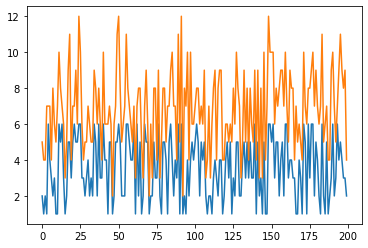

In [4]:
num_iters =200
trials = []
for _ in range(num_iters):
    trials.append(direct_sample())

plt.plot(trials)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y= x+x2'}>]], dtype=object)

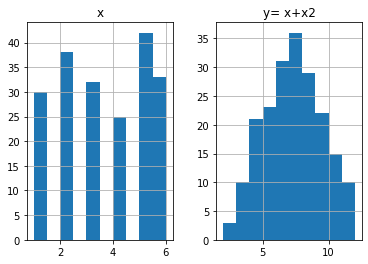

In [5]:
data = pd.DataFrame(trials, columns=['x', 'y= x+x2'])
data.hist()

## 2. 조건부 확률분포

In [6]:
def random_y_given_x(x):
    # x값을 알고 있다는 전제 하에
    # y값이 선택될 확률
    # y는 x+1, x+2, x+3
    # x+4, x+5, x+6 가운데 하나
    return x + roll_a_die()

def random_x_given_y(y):
    # y값을 알고 있다는 전제 하에
    # x값이 선택될 확률
    # 첫째 둘째 주사위 값의 합이 7이거나
    # 7보다 작다면
    if y <= 7:
        # 첫번째 주사위의 눈은 1~6
        # 각 눈이 선택될 확률은 동일
        return random.randrange(1, y)
    # 만약 총합이 7보다 크다면
    else:
        # 첫번째 주사위의 눈은
        # y-6, y-5,..., 6
        # 각 눈이 선택될 확률은 동일
        return random.randrange(y-6, 7)

In [7]:
def gibbs_sample(num_iters=100):
    # 초기값이 무엇이든 상관없음
    x, y = 1, 2
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

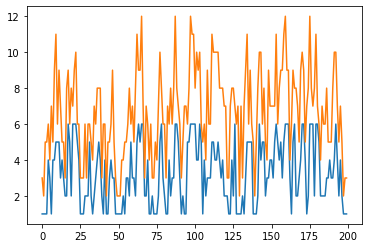

In [8]:
num_iters =200
x, y = 1, 2
trials = []
for _ in range(num_iters):
    x = random_x_given_y(y)
    y = random_y_given_x(x)
    trials.append([x,y])

plt.plot(trials)

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y= x+x2'}>]], dtype=object)

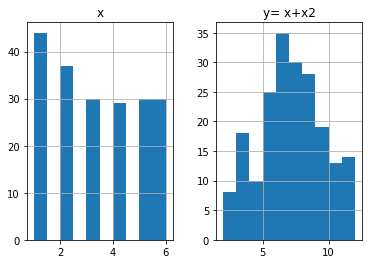

In [9]:
data = pd.DataFrame(trials, columns=['x', 'y= x+x2'])
data.hist()

### BBN: Bayesian Belief Networks — How to Build Them Effectively in Python
- https://towardsdatascience.com/bbn-bayesian-belief-networks-how-to-build-them-effectively-in-python-6b7f93435bba
- https://py-bbn.readthedocs.io/index.html

## Introduction to PyMC3: A Python package for probabilistic programming
https://towardsdatascience.com/introduction-to-pymc3-a-python-package-for-probabilistic-programming-5299278b428

### Bayesian network- Wikipedia
<img src= 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/SimpleBayesNet.svg/600px-SimpleBayesNet.svg.png'>

In [4]:
! pip install pybbn

  Created wheel for pybbn: filename=pybbn-3.2.1-py3-none-any.whl size=39725 sha256=8c3576708dbaab1a798efb01f75f2bc5b93b62ebcca4639ecfe93b44dbf1865b
  Stored in directory: c:\users\nfsi291\appdata\local\pip\cache\wheels\06\80\2f\0e63fe5497b2917af3b7bdcbb142985ba4e5e5ef9a2c0b14b9
Successfully built pybbn


In [5]:
import pandas as pd # for data manipulation 
import networkx as nx # for drawing graphs
import matplotlib.pyplot as plt # for drawing graphs

# for creating Bayesian Belief Networks (BBN)
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [12]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the weather data csv
df=pd.read_csv('./data/weatherAUS.csv') # , encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

# Create bands for variables that we want to use in the model
df['WindGustSpeedCat']=df['WindGustSpeed'].apply(lambda x: '0.<=40'   if x<=40 else
                                                            '1.40-50' if 40<x<=50 else '2.>50')
df['Humidity9amCat']=df['Humidity9am'].apply(lambda x: '1.>60' if x>60 else '0.<=60')
df['Humidity3pmCat']=df['Humidity3pm'].apply(lambda x: '1.>60' if x>60 else '0.<=60')

# Show a snaphsot of data
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustSpeedCat,Humidity9amCat,Humidity3pmCat
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No,1.40-50,1.>60,0.<=60
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No,1.40-50,0.<=60,0.<=60
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No,1.40-50,0.<=60,0.<=60
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No,0.<=40,0.<=60,0.<=60
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,1.40-50,1.>60,0.<=60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,No,0.<=40,0.<=60,0.<=60
145455,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,No,0.<=40,0.<=60,0.<=60
145456,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,No,0.<=40,0.<=60,0.<=60
145457,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,No,0.<=40,0.<=60,0.<=60


In [15]:
df['Humidity9amCat'].value_counts(normalize=True).sort_index()

0.<=60    0.306583
1.>60     0.693417
Name: Humidity9amCat, dtype: float64

## Bayesian Belief Networks (BBN) and Directed Acyclic Graphs (DAG)
<img src = 'https://miro.medium.com/max/875/1*bDfiBVnFaPeQzumj1mZN0w.png' width=300 height=300>
<img src='https://miro.medium.com/max/875/1*rzutIc-oHgiOc4pIsYU6HQ.png'>

In [16]:
# This function helps to calculate probability distribution, which goes into BBN (note, can handle up to 2 parents)
def probs(data, child, parent1=None, parent2=None):
    if parent1==None:
        # Calculate probabilities
        prob=pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
    elif parent1!=None:
            # Check if child node has 1 parent or 2 parents
            if parent2==None:
                # Caclucate probabilities
                prob=pd.crosstab(data[parent1],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
            else:    
                # Caclucate probabilities
                prob=pd.crosstab([data[parent1],data[parent2]],data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else: print("Error in Probability Frequency Calculations")
    return prob  

In [24]:
probs(df, child='Humidity9amCat')
probs(df, child='Humidity3pmCat', parent1='Humidity9amCat')
probs(df, child='WindGustSpeedCat')
probs(df, child='RainTomorrow', parent1='Humidity3pmCat', parent2='WindGustSpeedCat')

[0.30658330578861126, 0.6934166942113887]

[0.928269945405331, 0.071730054594669, 0.5576020040771205, 0.44239799592287954]

[0.5865970898708094, 0.24039861315254618, 0.1730042969766444]

[0.9231423408100351,
 0.07685765918996491,
 0.8907156673114119,
 0.109284332688588,
 0.7600840888188148,
 0.23991591118118513,
 0.6425022248590923,
 0.35749777514090775,
 0.4916834919719258,
 0.5083165080280743,
 0.3218170185540627,
 0.6781829814459372]

In [21]:
# Create nodes by manually typing in probabilities
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), [0.30658, 0.69342])
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), [0.92827, 0.07173, 0.55760, 0.44240])
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), [0.58660, 0.24040, 0.17300])
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), [0.92314, 0.07686, 
                                                0.89072, 0.10928, 
                                                0.76008, 0.23992, 
                                                0.64250, 0.35750, 
                                                0.49168, 0.50832, 
                                                0.32182, 0.67818])

In [22]:
# Create nodes by using our earlier function to automatically calculate probabilities
H9am = BbnNode(Variable(0, 'H9am', ['<=60', '>60']), probs(df, child='Humidity9amCat'))
H3pm = BbnNode(Variable(1, 'H3pm', ['<=60', '>60']), probs(df, child='Humidity3pmCat', parent1='Humidity9amCat'))
W = BbnNode(Variable(2, 'W', ['<=40', '40-50', '>50']), probs(df, child='WindGustSpeedCat'))
RT = BbnNode(Variable(3, 'RT', ['No', 'Yes']), probs(df, child='RainTomorrow', parent1='Humidity3pmCat', parent2='WindGustSpeedCat'))

In [25]:
# Create Network
bbn = Bbn() \
    .add_node(H9am) \
    .add_node(H3pm) \
    .add_node(W) \
    .add_node(RT) \
    .add_edge(Edge(H9am, H3pm, EdgeType.DIRECTED)) \
    .add_edge(Edge(H3pm, RT, EdgeType.DIRECTED)) \
    .add_edge(Edge(W, RT, EdgeType.DIRECTED))

# Convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

(-1.32, 1.32, -1.48, 2.48)

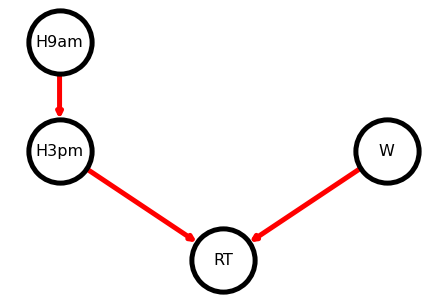

In [27]:
# Set node positions
pos = {0: (-1, 2), 1: (-1, 0.5), 2: (1, 0.5), 3: (0, -1)}

# Set options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000,
    "node_color": "white",
    "edgecolors": "black",
    "edge_color": "red",
    "linewidths": 5,
    "width": 5,}
    
# Generate graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

# Using BBN for predictions

In [28]:
# Define a function for printing marginal probabilities
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
# Use the above function to print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.67124
1=>60|0.32876
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.30658
0=>60|0.69342
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.77655
3=Yes|0.22345
----------------


In [29]:
# To add evidence of events that happened so probability distribution can be recalculated
def evidence(ev, nod, cat, val):
    ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name(nod)) \
    .with_evidence(cat, val) \
    .build()
    join_tree.set_observation(ev)
    
# Use above function to add evidence
evidence('ev1', 'H9am', '>60', 1.0)

# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.55760
1=>60|0.44240
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.58660
2=40-50|0.24040
2=>50|0.17300
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.73833
3=Yes|0.26167
----------------


In [30]:
# Add more evidence
evidence('ev1', 'H3pm', '>60', 1.0)
evidence('ev2', 'W', '>50', 1.0)
# Print marginal probabilities
print_probs()

Node: 1|H3pm|<=60,>60
Values:
1=<=60|0.00000
1=>60|1.00000
----------------
Node: 0|H9am|<=60,>60
Values:
0=<=60|0.00000
0=>60|1.00000
----------------
Node: 2|W|<=40,40-50,>50
Values:
2=<=40|0.00000
2=40-50|0.00000
2=>50|1.00000
----------------
Node: 3|RT|No,Yes
Values:
3=No|0.32182
3=Yes|0.67818
----------------
